In [3]:
#MODE
folder = 'Res'

In [4]:
import numpy as np
import csv
import math
%matplotlib inline
import matplotlib.pyplot as plt
import decimal
import time
from sklearn.metrics import auc
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator, AutoMinorLocator
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

In this section I'm plotting only the NT information for:
    -numpirm
    -numpi
    -Vertex position
    -Angle tetha
    -Angle Alpha 
    -True Energies of all pions
    -True energies per pion
    -Histogram heatmap of pion energies per number of pions in events
    -True full spectrum neutrino
    -NEutrino spectrum for pions
    -Histogram heatmap of neutrino energies per number of pions per event.

In [59]:
def read_file(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        return [row for row in reader]
        
def read_file2(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        # Skip the first and last element in each row
        return [row[1:-1] for row in reader]

def autobins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width)
    
    # Calculate bin size
    bin_size = (max_value - min_value) / num_bins
    
    bin_edges = np.arange(min_value, max_value, bin_size) 
    
    return bin_edges

def numbins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width) 
    
    return num_bins

def set_plot_style(labels=None, loc='best'):
    # Automatically set the number of major ticks
    plt.gca().xaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # Automatically set the number of minor ticks
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    # Change the length of the tick marks
    plt.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)  # Adjust the length as needed
    plt.tick_params(axis='both', which='minor', length=7, width=1.2,direction='in', top=True, right=True)  # Minor ticks

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    # Change the width of the frame surrounding the plot
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Move the axes inside the plot
    ax = plt.gca()
    ax.spines['top'].set_position(('outward', 0))
    ax.spines['right'].set_position(('outward', 0))
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))

    # Adjust the position of the ticks
    ax.tick_params(axis='x', direction='in', length=15, width=2)
    ax.tick_params(axis='y', direction='in', length=15, width=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Add NOνA Simulation text inside the plot square at the title position
#     plt.text(1.0, 1.1, fr'NO$\nu$A Simulation', fontsize=28, color='blue', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(1.0, 1.1, fr'NOvA Simulation', fontsize=28, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

    # Create custom legend handles if labels are provided
    if labels is not None:
        handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
        plt.legend(handles=handles, labels=labels, fontsize=20, loc=loc)
        
def set_sn():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        coeff, exponent = '{:.2e}'.format(x).split('e')
        if float(coeff) == 0:
            return r'$0$'
        else:
            return r'${:.0f}$'.format(float(coeff))

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]

    plt.text(1, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
def set_sn2():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(xlim[0], upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
def set_sn3():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(0.05, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')

In [27]:
folder='MEC'

In [28]:
#Extracting numpivtx NT info
#numprim, numpi, vtx position


start_time = time.time()

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "numpivarsnt"
name_of_file = 'numpivtxvarsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------

numprimNT = []
numpiNT = []
vtxxNT = []
vtxyNT = []
vtxzNT = []
# 
for event in globals()[list_variable]:
    numprimNT.append(int(event[0]))
    numpiNT.append(int(event[1]))
    vtxxNT.append(float(event[2]))
    vtxyNT.append(float(event[3]))
    vtxzNT.append(float(event[4]))
    
#Extrecting the Theta info. This is already the value of the angle

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "theta"
name_of_file = 'thetavarsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------

thetaNT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        thetaNT.append(float(event[i]))
        
        
#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "energies"
name_of_file = 'energiesvarsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------

energiesNT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        energiesNT.append(float(event[i]))

#print(thetaNT)

#Compute the angle between the lepton and the pions
#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "alpha"
name_of_file = 'alphavarsNT_total'

#Extract the info----------don't touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------

alphaNT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    pionvec = []
    if l > 3:
        ene = int(l/3)-1
        lepx=float(event[0])
        lepy=float(event[1])
        lepz=float(event[2])
        magnitudelep = math.sqrt(lepx**2 + lepy**2 + lepz**2)
            
        for j in range(ene):
            indice = 3*(j+1)
            pionx=float(event[indice])
            piony=float(event[indice+1])
            pionz=float(event[indice+2])
            
            dot_product = lepx * pionx + lepy * piony + lepz * pionz
            magnitudepion = math.sqrt(pionx**2 + piony**2 + pionz**2)
    
            #if magnitude1 == 0 or magnitude2 == 0:
            #   raise ValueError("One or both vectors have zero magnitude.")
    
            cos_theta = dot_product / (magnitudelep * magnitudepion)
            if cos_theta > 1.0:
                #print(cos_theta)
                cos_theta=1.0
            alpha_rad = math.acos(cos_theta)
            alpha_deg = math.degrees(alpha_rad)
            alphaNT.append(alpha_rad)

#print(alphaNT)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.30020880699157715 seconds


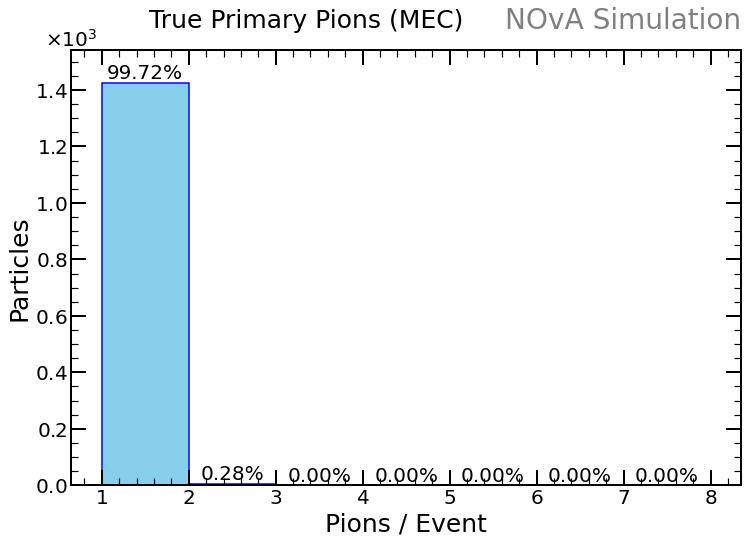

total number of pions: 1432
Total events: 1428, 0.14%


In [29]:
#plotting services

bin_size=1

# Calculate total count
nevents = len(numpiNT)
percentage = (nevents * 100) / 1026703
# Define bin edges
bin_edges = np.arange(1, 9, bin_size)

# Create histogram
plt.figure(figsize=(12, 8))
plt.hist(numpiNT, bins=bin_edges, edgecolor='blue', linewidth=1.5, color='skyblue')

# Calculate and add percentage annotations
for i in range(len(bin_edges) - 1):
    count = np.count_nonzero((numpiNT >= bin_edges[i]) & (numpiNT < bin_edges[i+1]))
    percent = count / nevents * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, count, f'{percent:.2f}%', ha='center', va='bottom', fontsize=20)

# Add text for nevents using normalized coordinates
# plt.text(0.5, 0.9, f'Total events: {nevents}, {percentage:.2f}%', transform=plt.gca().transAxes, fontsize=25, ha='center', va='center', color='blue')
    
    
plt.xlabel('Pions / Event', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.title(f'True Primary Pions ({folder})',x=0.35, y=1.038,fontsize=25)
#plt.title(f'True Primary Pions ({folder})', fontsize=30)
set_plot_style()
set_sn2()

#change the number of ticks in the y axis
#plt.locator_params(axis='y', nbins=4)
# y_max = plt.ylim()[1]
# num_digits = len(str(abs(int(y_max))))
# exponent = int(num_digits)

# plt.ylim(0,y_max+(0.03*y_max))

# Save and show plot
# plt.savefig(f"{folder}/images/numpi_NT_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/numpi_NT_{folder}.png', bbox_inches='tight')
plt.show()

nipi=sum(numpiNT)
print(f'total number of pions: {nipi}')
print(f'Total events: {nevents}, {percentage:.2f}%')

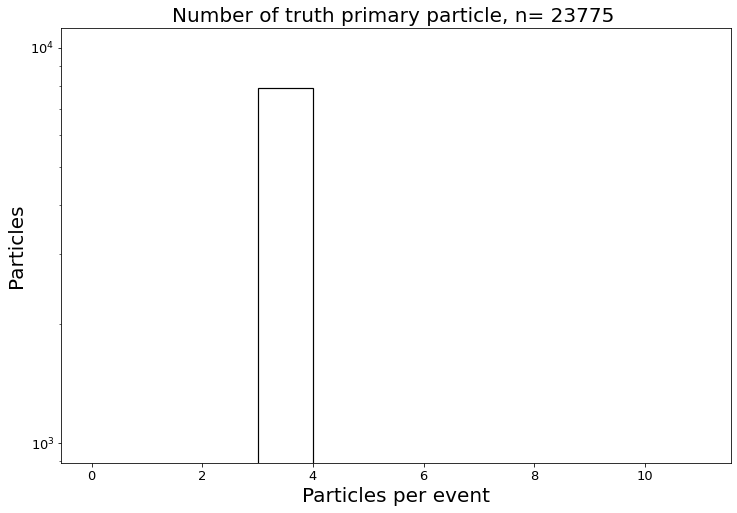

In [29]:
# Define histogram parameters


bin_size = 1
bin_edges = np.arange(0, 12, bin_size) 

#NUMPRIM_NT
nptot=sum(numprimNT)
plt.figure(figsize=(12, 8)) 
plt.hist(numprimNT, bins=bin_edges, edgecolor='black', linewidth=1.2, color ='white')
plt.xlabel('Particles per event', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Number of truth primary particle, n= {nptot} ', fontsize=20)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.yscale('log')
plt.savefig(f"{folder}/images/numprim_NT_{folder}.png")
plt.show()



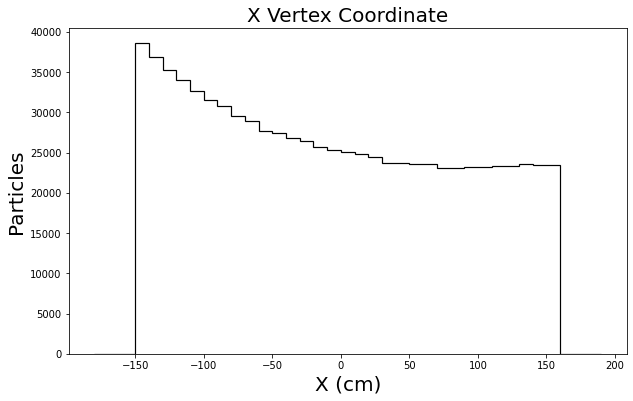

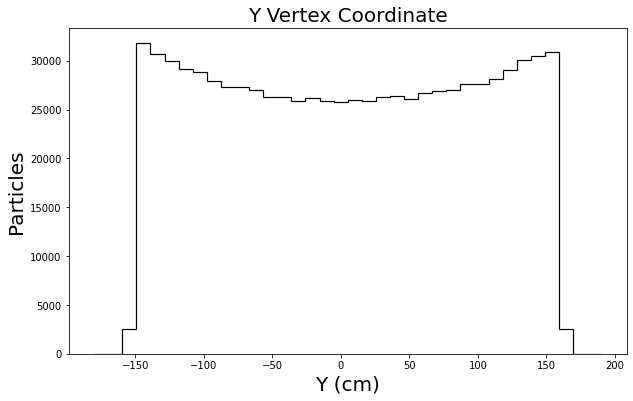

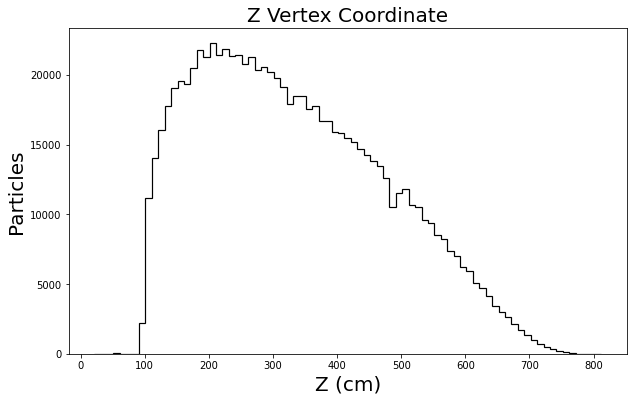

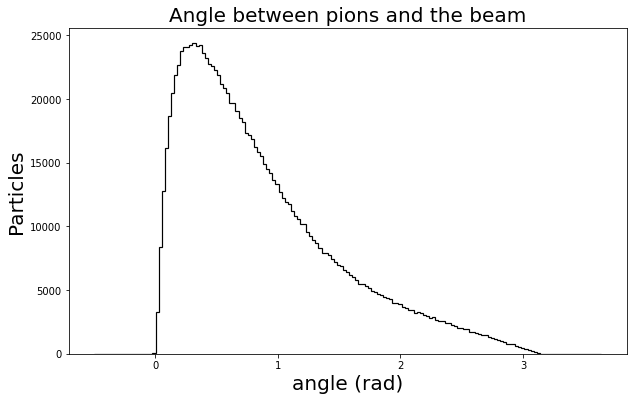

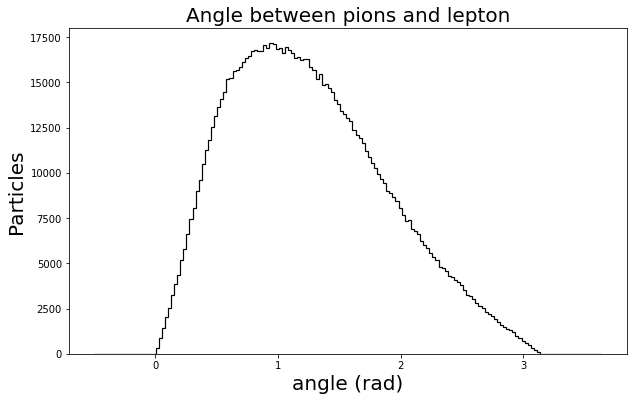

In [40]:
#VERTEX

#bin_size = 0.025
bin_size = 10


#X
# Define histogram parameters
data_min = np.min(vtxxNT)
data_max = np.max(vtxxNT)
hist_min = data_min - 30
hist_max = data_max + 30

num_bins = int((hist_max - hist_min) / bin_size)
bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
#bin_edges = np.arange(0, 3, bin_size) 
    
plt.figure(figsize=(10, 6)) 
plt.hist(vtxxNT, bins=bin_edges, edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('X (cm)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('X Vertex Coordinate', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/vtxxNT.png")
plt.show()


#Y
# Define histogram parameters
data_min = np.min(vtxyNT)
data_max = np.max(vtxyNT)
hist_min = data_min - 30
hist_max = data_max + 30

num_bins = int((hist_max - hist_min) / bin_size)
bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
#bin_edges = np.arange(0, 3, bin_size) 

plt.figure(figsize=(10, 6)) 
plt.hist(vtxyNT, bins=bin_edges, edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Y (cm)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Y Vertex Coordinate', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/vtxyNT.png")
plt.show()


#Z
# Define histogram parameters
data_min = np.min(vtxzNT)
data_max = np.max(vtxzNT)
hist_min = data_min - 30
hist_max = data_max + 30

num_bins = int((hist_max - hist_min) / bin_size)
bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
#bin_edges = np.arange(0, 3, bin_size) 
    
plt.figure(figsize=(10, 6)) 
plt.hist(vtxzNT, bins=bin_edges, edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Z (cm)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Z Vertex Coordinate', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/vtxzNT.png")
plt.show()



bin_size = 0.025
#Theta angle
# Define histogram parameters
data_min = np.min(thetaNT)
data_max = np.max(thetaNT)
hist_min = data_min - 0.5
hist_max = data_max + 0.5

num_bins = int((hist_max - hist_min) / bin_size)
bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
#bin_edges = np.arange(0, 3, bin_size) 
    

plt.figure(figsize=(10, 6)) 
plt.hist(thetaNT, bins=bin_edges, edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('angle (rad)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Angle between pions and the beam', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/thetaNT.png")
plt.show()


#Alpha angle
# Define histogram parameters
data_min = np.min(alphaNT)
data_max = np.max(alphaNT)
hist_min = data_min - 0.5
hist_max = data_max + 0.5

num_bins = int((hist_max - hist_min) / bin_size)
bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
plt.figure(figsize=(10, 6)) 
plt.hist(alphaNT, bins=bin_edges, edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('angle (rad)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Angle between pions and lepton', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/alphaNT.png")
plt.show()


In [38]:
folder='NoCut'

In [39]:
#Now take the information of the energies

start_time = time.time()


#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epiNT"
name_of_file = 'energiesvarsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epiNT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epiNT.append(float(event[i]))
        
%store epiNT
#NOW PER NUMBER OF PIONS
        
#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epi1NT"
name_of_file = 'energies1varsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epi1NT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epi1NT.append(float(event[i]))
        
        

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epi2NT"
name_of_file = 'energies2varsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epi2NT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epi2NT.append(float(event[i]))
        
        

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epi3NT"
name_of_file = 'energies3varsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epi3NT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epi3NT.append(float(event[i]))
        
        

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epi4NT"
name_of_file = 'energies4varsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epi4NT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epi4NT.append(float(event[i]))
        
        

        
#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epi5NT"
name_of_file = 'energies5varsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epi5NT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epi5NT.append(float(event[i]))
        
        

        
#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epi6NT"
name_of_file = 'energies6varsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epi6NT = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epi6NT.append(float(event[i]))
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Stored 'epiNT' (list)
Elapsed time: 4.984037399291992 seconds


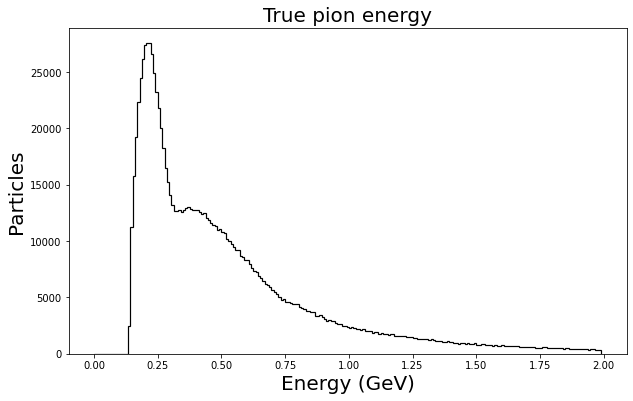

In [7]:
# Define histogram parameters
#bin_size = 0.025
#bin_edges = np.arange(0, 1, bin_size) 
    
#Epi for PNG nocvn
plt.figure(figsize=(10, 6)) 
plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('True pion energy', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/epiNT.png")
plt.show()


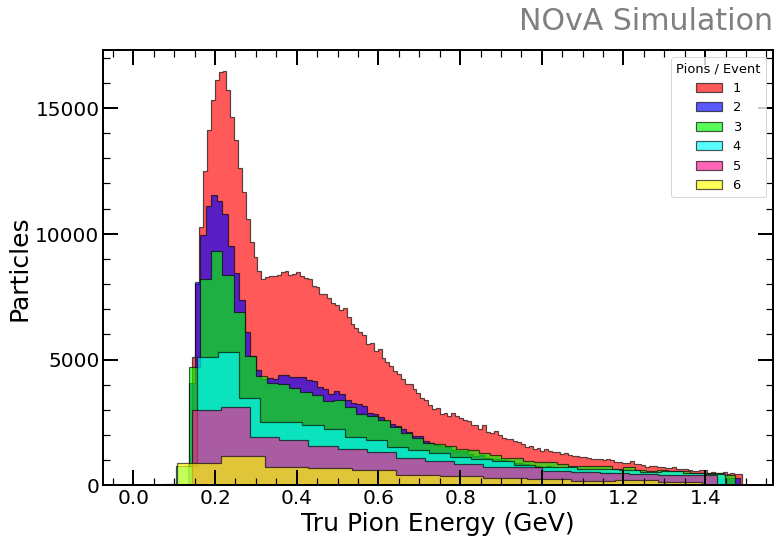

In [43]:
# Define histogram parameters
#bin_size = 0.025
#bin_edges = np.arange(0, 1.7, bin_size) 
    
#Epi for PNG nocvn
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(epi1NT, bins=autobins(epi1NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=0.65, label='1', color='red')
plt.hist(epi2NT, bins=autobins(epi2NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=0.65, label='2', color='blue')
plt.hist(epi3NT, bins=autobins(epi3NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=0.65, label='3', color='lime')
plt.hist(epi4NT, bins=autobins(epi4NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=0.65, label='4', color='cyan')
plt.hist(epi5NT, bins=autobins(epi5NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=0.65, label='5', color='deeppink')
plt.hist(epi6NT, bins=autobins(epi6NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=0.65, label='6', color='yellow')
plt.xlabel('Tru Pion Energy (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
#plt.title('True energy of charged pions', fontsize=30)
set_plot_style()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)


plt.legend(title='Pions / Event', fontsize=13, title_fontsize=13)


plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energiesperpionNT_{folder}.png', bbox_inches='tight')
plt.show()

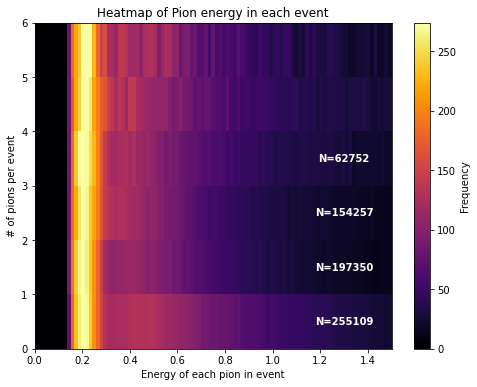

In [36]:
#first method to plot the pion infor for the heatmap

# Set up bin edges for x-axis
x_bins = np.linspace(0, 1.5, 100)  # 51 bins from 0 to 5
y_values1 = np.zeros_like(epi1NT)+0.5
y_values2 = np.zeros_like(epi2NT)+1.5
y_values3 = np.zeros_like(epi3NT)+2.5
y_values4 = np.zeros_like(epi4NT)+3.5
y_values5 = np.zeros_like(epi5NT)+4.5
y_values6 = np.zeros_like(epi6NT)+5.5
# Calculate frequency of each value
plt.figure(figsize=(8, 6))
plt.hist2d(epi1NT, y_values1, bins=[x_bins, 1], cmap='inferno')
plt.hist2d(epi2NT, y_values2, bins=[x_bins, 1], cmap='inferno')
plt.hist2d(epi3NT, y_values3, bins=[x_bins, 1], cmap='inferno')
plt.hist2d(epi4NT, y_values4, bins=[x_bins, 1], cmap='inferno')
plt.hist2d(epi5NT, y_values5, bins=[x_bins, 1], cmap='inferno')
plt.hist2d(epi6NT, y_values6, bins=[x_bins, 1], cmap='inferno')
plt.text(1.3, 0.5, f'N={len(epi1NT)}', color='white', fontsize=10, ha='center', va='center',fontweight='bold')
plt.text(1.3, 1.5, f'N={len(epi2NT)}', color='white', fontsize=10, ha='center', va='center',fontweight='bold')
plt.text(1.3, 2.5, f'N={len(epi3NT)}', color='white', fontsize=10, ha='center', va='center',fontweight='bold')
plt.text(1.3, 3.5, f'N={len(epi4NT)}', color='white', fontsize=10, ha='center', va='center',fontweight='bold')
plt.colorbar(label='Frequency')
plt.xlabel('Energy of each pion in event')
plt.ylabel('# of pions per event')
plt.ylim(0,6)
plt.title('Heatmap of Pion energy in each event')
#plt.savefig(f"{folder}/images/heatmapPionEnergypervenet.png")
plt.show()

#BE CAREFUL, THIS ONE IS COSIDERING THE ENERGY OF EACH PION IN EACH EVENT SEPARATELY 

In [80]:
start_time = time.time()

#Secon method of extracting the pion info for the heatmap

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epiNT"
name_of_file = 'energiesvarsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------
# Initialize a list of lists to store epi values

epis = [[] for _ in range(7)]

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    # Calculate the sum of elements in the event and append to the appropriate epi list
    summ = sum(float(x) for x in event)
    if 1 <= l <= 6:
        epis[l].append(summ)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 8.39304494857788 seconds


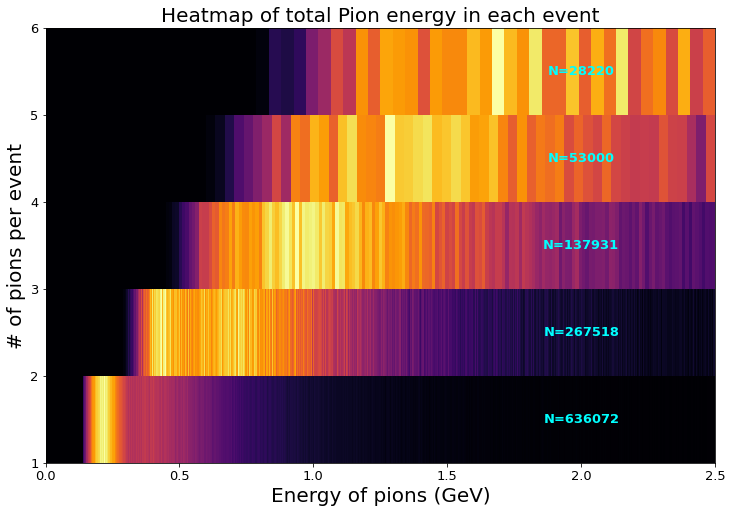

In [81]:
#Second method of plotting the pion info for the heatmap.

#Define plot range
xstart=0
xend=2.5

# Define x bins
x_bins = np.linspace(0, 3.5, 2135)

bbins = []

for i in range(len(epis)):
    if i==0:
        bbins.append(np.linspace(xstart, xend, 100))
    else:
        bbins.append(np.linspace(xstart, xend, numbins(epis[i])))


# Define y values
y_values = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Define number of pions per event
num_pions_per_event = [len(epi) for epi in epis]

plt.figure(figsize=(12, 8))

# Plot each histogram
for i, (epi, y_value, num_pions, bbin) in enumerate(zip(epis, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(epi, np.zeros_like(epi)+y_value, bins=[bbin, 1], cmap='inferno')
    if i!=1:
        plt.text(2, y_value, f'N={(i-1)*num_pions}', color='cyan', fontsize=13, ha='center', va='center', fontweight='bold')

#plt.colorbar(label='Frequency')
plt.xlabel('Energy of pions (GeV)', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('# of pions per event', fontsize=20)
plt.ylim(1, 6)
plt.title('Heatmap of total Pion energy in each event', fontsize=20)
plt.savefig(f"{folder}/images/heatmapPionTotalEnergypervenet.png")
plt.show()

In [45]:
#FIRST, EXTRACTING THE WHOLE INFORMATION OF NEUTRINOS. THIS PLOT IS NOT SO NECESARY. NO RELEVANT INFO HERE

start_time = time.time()


#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "nuevars"
name_of_file = 'nuevarsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------
# Initialize a list of lists to store epi values

nuEfull = []

for event in globals()[list_variable]:
    nuEfull.append(float(event[1]))

#print(nuEvars[4])
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1.613358736038208 seconds


In [46]:
#NOW LETS PRINT THE NEUTRINO ENERGY ONLY FOR THE EVENTS WITH PIONS AND HOW MUCH PIONS
start_time = time.time()


#CHECK THE NUMBER OF PIONS IN EACH EVENT
#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "pdgs"
name_of_file = 'pdgntvars_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------
# Initialize a list of lists to store epi values

numpi = []

for event in globals()[list_variable]:
    npi=0
    for x in event:
        if x == '211' or x == '-211':
            npi = npi+1
    numpi.append(npi)


#NOW SELECT AND DIVIDE BY NUMPI FOR THE NEUTRINO EVENTS

nuesAllpion = []

nues = [[] for _ in range(6)]

pos =0
for npi in numpi:
    if npi >= 1:
        nuesAllpion.append(nuEfull[pos])
    if npi <= 5:
        nues[npi].append(nuEfull[pos])
    pos = pos + 1

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.3230879306793213 seconds


In [65]:
folder='MEC'
temp=[]
nus=[]
temp=read_file2(folder, 'nuevarsNT_total')
nus = [float(element) for sublist in temp for element in sublist] 


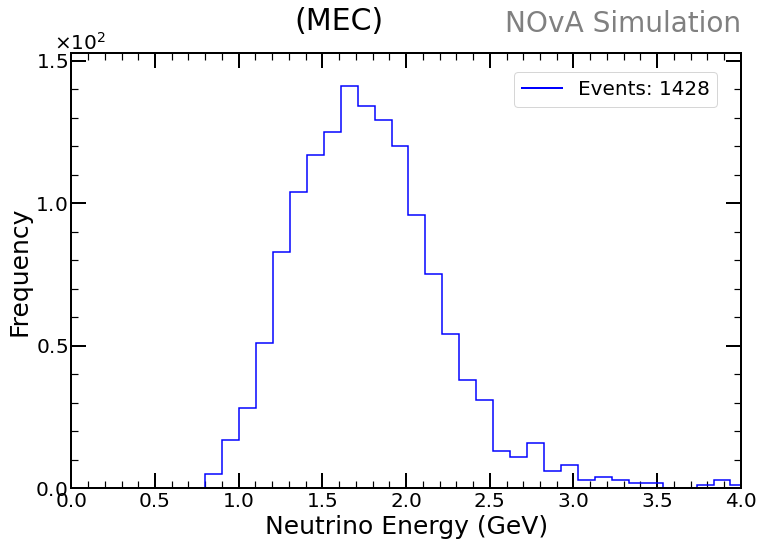

In [66]:
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(nus, bins=autobins(nus), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.04, fontsize=30)
# plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))
set_plot_style()
set_sn3()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(0,4)

handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[f'Events: {len(nus)}'], fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))


# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/nuenergies_NT_{folder}.png', bbox_inches='tight')
plt.show()   


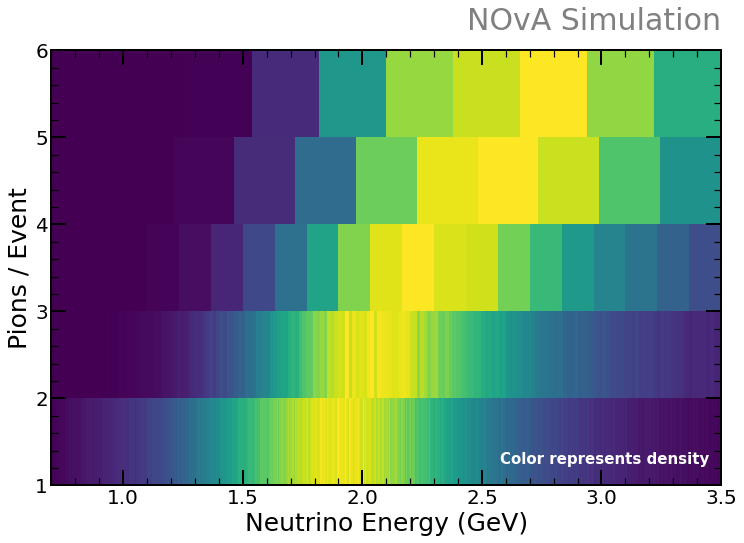

In [59]:
#Second method of plotting the pion info for the heatmap.

xstart=0.7
xend=3.5

bbins = []

for i in range(len(nues)):
    if i==0:
        bbins.append(np.linspace(xstart, xend, 100))
    else:
        bbins.append(np.linspace(xstart, xend, numbins(nues[i],0,10)))

# Define y values
y_values = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Define number of pions per event
num_pions_per_event = [len(nue) for nue in nues]

plt.figure(figsize=(12, 8))

# Plot each histogram
for i, (nue, y_value, num_pions, bbin) in enumerate(zip(nues, y_values, num_pions_per_event, bbins), start=0):
    plt.hist2d(nue, np.zeros_like(nue)+y_value, bins=[bbin, 1], cmap='viridis')
    #plt.text(3.3, y_value, f'N={(i)*num_pions}', color='white', fontsize=10, ha='center', va='center', fontweight='bold')

#plt.colorbar(label='Frequency')
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event', fontsize=25)
plt.ylim(1, 6)
set_plot_style()
plt.text(3.45, 1.3, 'Color represents density', color='white', fontsize=15, ha='right', va='center',fontweight='bold')
#plt.title('Neutrino energy per number of pions in event', fontsize=29)
plt.savefig(f"{folder}/images/heatmapNeutrinoEnergyperevent_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmapNeutrinoEnergyperevent_{folder}.png', bbox_inches='tight')
plt.show()

In [ ]:
#END OF THE NOTEBOOK

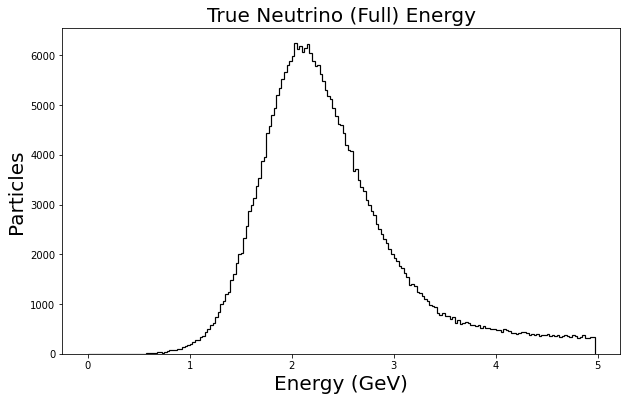

In [44]:
# Define histogram parameters
bin_size = 0.025
bin_edges = np.arange(0, 5, bin_size) 
    
#Epi for PNG nocvn
plt.figure(figsize=(10, 6)) 
plt.hist(nuEfull, bins=bin_edges, edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('True Neutrino (Full) Energy', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/fullNuE.png")
plt.show()

In [37]:
start_time = time.time()

#first method to extract the info of pions for the heatmap.

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epiNT"
name_of_file = 'energiesvarsNT_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epi1 = []
epi2 = []
epi3 = []
epi4 = []
epi5 = []
epi6 = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    if l == 1:
        epi1.append(float(event[0]))
    if l == 2:
        summ=0
        for i in range(l):
            summ=summ+float(event[i])
        epi2.append(summ)
    if l == 3:
        summ=0
        for i in range(l):
            summ=summ+float(event[i])
        epi3.append(summ)
    if l == 4:
        summ=0
        for i in range(l):
            summ=summ+float(event[i])
        epi4.append(summ)
    if l == 5:
        summ=0
        for i in range(l):
            summ=summ+float(event[i])
        epi5.append(summ)
    if l == 6:
        summ=0
        for i in range(l):
            summ=summ+float(event[i])
        epi6.append(summ)
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.1525564193725586 seconds


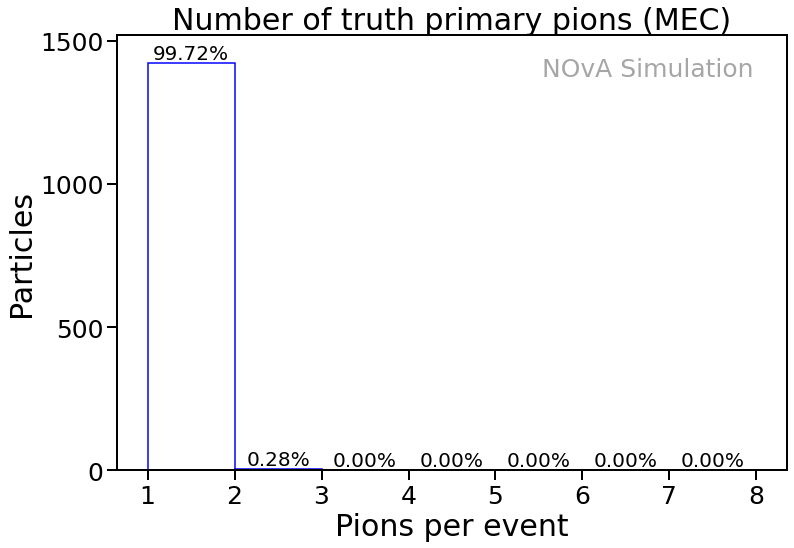

total number of pions: 1432


In [32]:
#plotting services
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator

bin_size=1

# Calculate total count
nevents = len(numpiNT)

# Define bin edges
bin_edges = np.arange(1, 9, bin_size)

# Create histogram
plt.figure(figsize=(12, 8))
plt.hist(numpiNT, bins=bin_edges, edgecolor='blue', linewidth=1.5, color='white')

# Calculate and add percentage annotations
for i in range(len(bin_edges) - 1):
    count = np.count_nonzero((numpiNT >= bin_edges[i]) & (numpiNT < bin_edges[i+1]))
    percent = count / nevents * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, count, f'{percent:.2f}%', ha='center', va='bottom', fontsize=20)

#comment this to disable the scientific notation
# Customize y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')  # Turn off scientific notation
plt.gca().yaxis.get_offset_text().set_visible(False)  # Hide the scientific notation

# Define custom formatter for y-axis ticks
def custom_formatter(x, pos):
    coeff, exponent = '{:.2e}'.format(x).split('e')
    if float(coeff) == 0:
        return fr'$0$'
    else:
        return fr'${float(coeff):.0f} \times 10^{{{int(exponent)}}}$' #change the 1f number to increase decimals

#plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))


plt.xlabel('Pions per event', fontsize=30)
plt.ylabel('Particles', fontsize=30)
plt.title(f'Number of truth primary pions ({folder})', fontsize=30)
#plt.ylim(0,550000) #only in RES
#plt.ylim(0,17500) # QE
plt.ylim(0,1520)  #MEC
#plt.ylim(0,280000) #DIS

# Automatically set the number of y ticks
#num_ticks = 5  # Change the number of desired ticks
#locator = MultipleLocator(base=max(plt.yticks()[0]) / (num_ticks - 1))
#plt.gca().yaxis.set_major_locator(locator)

#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)

# Set tick font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Change the length of the tick marks
plt.tick_params(axis='both', which='major', length=10, width=2)  # Adjust the length as needed
plt.tick_params(axis='both', which='minor', length=7, width=1.2)  # Minor ticks

# Add more minor ticks on the y-axis the number represents the step
plt.gca().yaxis.set_minor_locator(MultipleLocator(500))

# Change the width of the frame surrounding the plot
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the linewidth as needed
    
# Add NOvA Simulation text inside the plot square
plt.text(0.95, 0.95, 'NOvA Simulation', fontsize=25, color='gray', alpha=0.7, ha='right', va='top', transform=plt.gca().transAxes)


# Save and show plot
plt.savefig(f"{folder}/images/numpi_NT_{folder}.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/numpi_NT_{folder}.png', bbox_inches='tight')
plt.show()

nipi=sum(numpiNT)
print(f'total number of pions: {nipi}')